In [ ]:
!pip install PyPDF2
!pip install PyMuPDF
!pip install pytesseract

In [ ]:
import fitz  # PyMuPDF 라이브러리

pdf_file_path = "PDF_test02_from_word.pdf"
target_color = (1, 1, 0)  # 형광색(노란색)의 RGB 값

doc = fitz.open(pdf_file_path)
for page_num in range(len(doc)):
    page = doc[page_num]
    annot_list = page.annots()

    for annot in annot_list:
        if isinstance(annot, fitz.Annot) and annot.info.get("color") == target_color:
            marked_text = annot.info.get("subject")
            print(marked_text)


In [ ]:
import fitz  # PyMuPDF의 모듈

def is_red(text_color):
   # 빨간색(RGB 255, 0, 0) 확인
   return text_color == (1.0, 0, 0)

pdf_document = "PDF_test02_from_word.pdf"  # 분석할 PDF 파일명

# PDF 파일 열기
pdf_document = fitz.open(pdf_document)

red_text = []

for page_number in range(pdf_document.page_count):
   page = pdf_document.load_page(page_number)
   for block in page.get_text("blocks"):
       for span in block[4]:  # span[4]는 텍스트 내용
           for span_elem in span:
               if len(span_elem) > 5 and is_red(span_elem[5]):  # span_elem[5]는 텍스트의 색상 정보
                   red_text.append(span_elem[4])  # span_elem[4]는 텍스트 내용

# 추출한 빨간 텍스트 출력
for text in red_text:
   print(text)

pdf_document.close()


In [ ]:
for text in red_text:
    print(text)


In [ ]:
import fitz
import pytesseract
from PIL import Image

def extract_text_from_pdf(pdf_file):
    doc = fitz.open(pdf_file)
    extracted_text = ""

    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        image_list = page.get_images(full=True)

        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_data = base_image["image"]

            # Save the image to a temporary file for OCR
            with open(f"temp_image_{img_index}.png", "wb") as img_file:
                img_file.write(image_data)

            # Extract text from the image using OCR
            img_text = pytesseract.image_to_string(Image.open(f"temp_image_{img_index}.png"))
            extracted_text += img_text

    return extracted_text

pdf_file = "PDF_test02_from_word.pdf"
extracted_text = extract_text_from_pdf(pdf_file)
print(extracted_text)


In [28]:
!pip install nltk

In [30]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
from nltk.corpus import wordnet

# 두 단어의 의미를 추출
word1 = wordnet.synset('fruit.n.01')  # 'car'의 첫 번째 의미
word2 = wordnet.synset('mango.n.01')  # 'automobile'의 첫 번째 의미

# 최단 경로 길이 계산
path_similarity = word1.path_similarity(word2)
print("유사도 점수:", path_similarity)

유사도 점수: 0.06666666666666667


In [38]:
from nltk.corpus import wordnet

# 단어의 Synset(의미 그룹)을 가져오는 함수
def get_synsets(word):
    return wordnet.synsets(word)

# 두 단어의 가장 유사한 의미 그룹 찾기
def find_most_similar_synset(word1, word2):
    synsets1 = get_synsets(word1)
    synsets2 = get_synsets(word2)

    max_similarity = 0
    most_similar_synset = None

    for synset1 in synsets1:
        for synset2 in synsets2:
            similarity = synset1.path_similarity(synset2)
            if similarity > max_similarity:
                max_similarity = similarity
                most_similar_synset = synset1 if similarity > 0.1 else None  # 유사도 임계값 설정

    return most_similar_synset

word1 = "car"
word2 = "automobile"

most_similar_synset = find_most_similar_synset(word1, word2)
if most_similar_synset:
    categories = most_similar_synset.hypernym_paths()[0]  # 첫 번째 상위어 경로 가져오기
    print(f"'{word1}' and '{word2}' belong to the category of: {', '.join(category.name().split('.')[0] for category in categories)}")
else:
    print(f"'{word1}' and '{word2}' do not belong to the same category.")


'car' and 'automobile' belong to the category of: entity, physical_entity, object, whole, artifact, instrumentality, container, wheeled_vehicle, self-propelled_vehicle, motor_vehicle, car


In [43]:
from nltk.corpus import wordnet

# 단어의 Synset(의미 그룹)을 가져오는 함수
def get_synsets(word):
    return wordnet.synsets(word)

# 상위어 관계를 그래프 형태로 표현하는 함수
def build_hypernym_tree(word, depth=0, max_depth=3):
    if depth > max_depth:
        return

    synsets = get_synsets(word)

    if synsets:
        # 단어의 상위어 출력
        print("  " * depth + f"{word} ({', '.join(synsets[0].pos())}: {', '.join(synsets[0].lemma_names())})")

        for synset in synsets:
            hypernyms = synset.hypernyms()
            for hypernym in hypernyms:
                build_hypernym_tree(hypernym.name().split(".")[0], depth + 1, max_depth)

word = "apple"

print(f"상위어 관계 트리 (최대 깊이 5까지) for '{word}':")
build_hypernym_tree(word)


상위어 관계 트리 (최대 깊이 5까지) for 'apple':
apple (n: apple)
  edible_fruit (n: edible_fruit)
    fruit (n: fruit)
      reproductive_structure (n: reproductive_structure)
      product (n: merchandise, ware, product)
      consequence (n: consequence, effect, outcome, result, event, issue, upshot)
      bear (n: bear)
    produce (n: produce, green_goods, green_groceries, garden_truck)
      food (n: food, nutrient)
      make (n: brand, make)
      make (n: brand, make)
      expose (n: expose, unmasking)
      cultivate (v: cultivate)
      change (n: change, alteration, modification)
  pome (n: pome, false_fruit)
    fruit (n: fruit)
      reproductive_structure (n: reproductive_structure)
      product (n: merchandise, ware, product)
      consequence (n: consequence, effect, outcome, result, event, issue, upshot)
      bear (n: bear)
  apple_tree (n: apple_tree)
    fruit_tree (n: fruit_tree)
      angiospermous_tree (n: angiospermous_tree, flowering_tree)


In [45]:
from nltk.corpus import wordnet

# 단어의 Synset(의미 그룹)을 가져오는 함수
def get_synsets(word):
    return wordnet.synsets(word)

# 단어의 상위어를 최상위 노드까지 추적하여 출력하는 함수
def print_hypernyms_to_top(word):
    synsets = get_synsets(word)

    if synsets:
        for synset in synsets:
            print(f"{word} ({', '.join(synset.pos())}: {', '.join(synset.lemma_names())})")

            hypernym_paths = synset.hypernym_paths()
            for path in hypernym_paths:
                for hypernym in path:
                    print("  " + hypernym.name().split(".")[0])
    else:
        print(f"No synsets found for '{word}'.")

word = "apple"

print(f"상위어 관계 (최상위까지) for '{word}':")
print_hypernyms_to_top(word)

상위어 관계 (최상위까지) for 'apple':
apple (n: apple)
  entity
  physical_entity
  object
  whole
  natural_object
  plant_part
  plant_organ
  reproductive_structure
  fruit
  edible_fruit
  apple
  entity
  physical_entity
  matter
  solid
  food
  produce
  edible_fruit
  apple
  entity
  physical_entity
  object
  whole
  natural_object
  plant_part
  plant_organ
  reproductive_structure
  fruit
  pome
  apple
apple (n: apple, orchard_apple_tree, Malus_pumila)
  entity
  physical_entity
  object
  whole
  living_thing
  organism
  plant
  vascular_plant
  woody_plant
  tree
  angiospermous_tree
  fruit_tree
  apple_tree
  apple


In [61]:
import pandas as pd
df = pd.read_excel("2022_교육부_기본어휘_3000.xlsx")
df.head()

df1 = df["표제어"].replace("*", "")

df2= df1.str.replace(r'\*', '', regex=True)
df2= df2.str.replace(r' ', '', regex=True)


df2

0             a
1       abandon
2          able
3        aboard
4         abort
         ...   
2995      young
2996      zebra
2997       zero
2998       zone
2999        zoo
Name: 표제어, Length: 3000, dtype: object

In [63]:
from nltk.corpus import wordnet

# 단어의 Synset(의미 그룹)을 가져오는 함수
def get_synsets(word):
    return wordnet.synsets(word)

# 단어를 의미 또는 주제로 그룹화하는 함수
def categorize_word_by_meaning(word):
    synsets = get_synsets(word)

    categories = set()
    for synset in synsets:
        hypernyms = synset.hypernyms()
        for hypernym in hypernyms:
            categories.add(hypernym.name().split(".")[0])

    return list(categories)

# 각 단어를 카테고리화
for word in df2:
    categories = categorize_word_by_meaning(word)[:3]
    print(f"{word}의 카테고리: {', '.join(categories)}")


a의 카테고리: fat-soluble_vitamin, metric_linear_unit, blood_group
abandon의 카테고리: discard, unrestraint, passion
able의 카테고리: 
aboard의 카테고리: 
abort의 카테고리: exhaust, termination, end
abound의 카테고리: have, be
about의 카테고리: 
above의 카테고리: section
abroad의 카테고리: 
absent의 카테고리: disappear
absolute의 카테고리: abstraction
absorb의 카테고리: concentrate, receive, learn
abstract의 카테고리: steal, see, consider
absurd의 카테고리: situation
abuse의 카테고리: attack, use, disrespect
academy의 카테고리: establishment, secondary_school, institution
accelerate의 카테고리: intensify, change
accent의 카테고리: non-standard_speech, pronunciation, prosody
accept의 카테고리: be, get, receive
access의 카테고리: approach, code, operation
accident의 카테고리: happening, mishap
accommodate의 카테고리: house, comply, provide
accompany의 카테고리: consort, travel, play
accomplish의 카테고리: complete, succeed, effect
accord의 카테고리: match, give, harmony
account의 카테고리: statement, be, profit
accumulate의 카테고리: increase, store
accurate의 카테고리: 
accuse의 카테고리: charge
ache의 카테고리: perceive, hanker, pai

In [65]:
from nltk.corpus import wordnet
from collections import Counter

# 단어의 Synset(의미 그룹)을 가져오는 함수
def get_synsets(word):
    return wordnet.synsets(word)

# 단어를 의미 또는 주제로 그룹화하는 함수
def categorize_word_by_meaning(word):
    synsets = get_synsets(word)

    categories = set()
    for synset in synsets:
        hypernyms = synset.hypernyms()
        for hypernym in hypernyms:
            categories.add(hypernym.name().split(".")[0])

    return list(categories)

# 예시 단어 리스트

# 각 단어를 카테고리화하고 빈도수를 계산
category_counts = Counter()
for word in df2:
    categories = categorize_word_by_meaning(word)
    category_counts.update(categories)

# 빈도수를 오름차순으로 정렬하여 출력
sorted_categories = category_counts.most_common()
for category, count in sorted_categories:
    print(f"{category}: {count}회")

change: 208회
be: 129회
move: 127회
travel: 96회
act: 83회
person: 71회
make: 60회
supply: 51회
cover: 48회
hit: 47회
give: 46회
activity: 44회
change_state: 43회
shape: 41회
structure: 40회
communicate: 39회
touch: 39회
part: 39회
remove: 39회
time_period: 38회
state: 37회
work: 37회
evaluate: 36회
position: 36회
sound: 36회
get: 34회
play: 34회
put: 34회
inform: 32회
pass: 32회
happening: 31회
affect: 31회
control: 31회
object: 30회
motion: 29회
line: 29회
collection: 29회
have: 28회
increase: 28회
end: 27회
support: 27회
condition: 27회
turn: 27회
area: 27회
use: 26회
express: 26회
produce: 26회
experience: 26회
cut: 26회
attack: 25회
accept: 25회
record: 25회
region: 25회
device: 25회
body_part: 25회
artifact: 25회
think: 25회
attach: 25회
plan: 24회
transfer: 24회
request: 24회
treat: 23회
look: 23회
point: 23회
score: 23회
body: 23회
better: 22회
fasten: 22회
lie: 22회
content: 22회
grow: 22회
show: 22회
meet: 21회
write: 21회
property: 21회
mark: 21회
determine: 21회
talk: 21회
decrease: 21회
consume: 21회
see: 20회
take: 20회
choose: 20회
set: 20회
desire: 20회

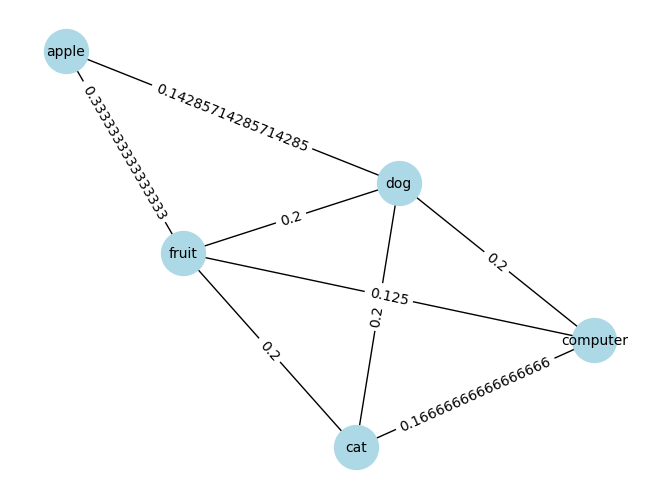

In [66]:
from nltk.corpus import wordnet
import networkx as nx
import matplotlib.pyplot as plt

# 단어 간의 연관성을 계산하는 함수
def calculate_similarity(word1, word2):
    synsets1 = wordnet.synsets(word1)
    synsets2 = wordnet.synsets(word2)

    max_similarity = 0.0

    for synset1 in synsets1:
        for synset2 in synsets2:
            similarity = synset1.path_similarity(synset2)
            if similarity is not None and similarity > max_similarity:
                max_similarity = similarity

    return max_similarity

# 단어 리스트
words = ["cat", "dog", "apple", "computer", "fruit"]

# 단어 간의 연관성 매핑
G = nx.Graph()

for word1 in words:
    for word2 in words:
        if word1 != word2:
            similarity = calculate_similarity(word1, word2)
            if similarity > 0.1:  # 임계값 설정
                G.add_edge(word1, word2, weight=similarity)

# 그래프 레이아웃 정의
layout = nx.spring_layout(G)

# 그래프 시각화
nx.draw(G, pos=layout, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)

# 엣지 가중치를 레이블로 추가
edge_labels = {(word1, word2): weight for word1, word2, weight in G.edges(data="weight")}
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)

plt.show()

change: 208회
be: 129회
move: 127회
travel: 96회
act: 83회
person: 71회
make: 60회
supply: 51회
cover: 48회
hit: 47회
give: 46회
activity: 44회
change_state: 43회
shape: 41회
structure: 40회
communicate: 39회
touch: 39회
part: 39회
remove: 39회
time_period: 38회
state: 37회
work: 37회
evaluate: 36회
position: 36회
sound: 36회
get: 34회
play: 34회
put: 34회
inform: 32회
pass: 32회
happening: 31회
affect: 31회
control: 31회
object: 30회
motion: 29회
line: 29회
collection: 29회
have: 28회
increase: 28회
end: 27회
support: 27회
condition: 27회
turn: 27회
area: 27회
use: 26회
express: 26회
produce: 26회
experience: 26회
cut: 26회
attack: 25회
accept: 25회
record: 25회
region: 25회
device: 25회
body_part: 25회
artifact: 25회
think: 25회
attach: 25회
plan: 24회
transfer: 24회
request: 24회
treat: 23회
look: 23회
point: 23회
score: 23회
body: 23회
better: 22회
fasten: 22회
lie: 22회
content: 22회
grow: 22회
show: 22회
meet: 21회
write: 21회
property: 21회
mark: 21회
determine: 21회
talk: 21회
decrease: 21회
consume: 21회
see: 20회
take: 20회
choose: 20회
set: 20회
desire: 20회

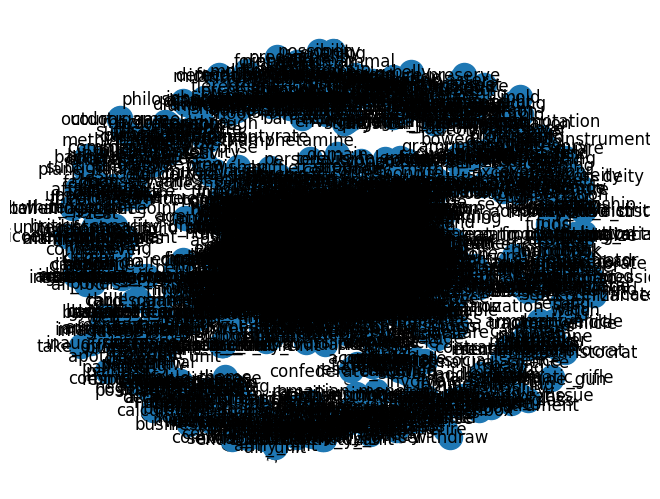

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

# 단어의 Synset(의미 그룹)을 가져오는 함수
def get_synsets(word):
    return wordnet.synsets(word)

# 단어를 의미 또는 주제로 그룹화하는 함수
def categorize_word_by_meaning(word):
    synsets = get_synsets(word)

    categories = set()
    for synset in synsets:
        hypernyms = synset.hypernyms()
        for hypernym in hypernyms:
            categories.add(hypernym.name().split(".")[0])

    return list(categories)

# 각 단어를 카테고리화하고 빈도수를 계산
category_counts = Counter()
for word in df2:
    categories = categorize_word_by_meaning(word)
    category_counts.update(categories)

# 빈도수를 오름차순으로 정렬하여 출력
sorted_categories = category_counts.most_common()
for category, count in sorted_categories:
    print(f"{category}: {count}회")

# 카테고리 간의 유사도 그래프 생성
# 카테고리 간의 유사도 그래프 생성
G = nx.Graph()
for category1, count1 in sorted_categories:
    for category2, count2 in sorted_categories:
        if category1 != category2:
            set1 = set(categorize_word_by_meaning(category1))
            set2 = set(categorize_word_by_meaning(category2))
            # 분모가 0인 경우 방지
            if len(set1) == 0 or len(set2) == 0:
                continue
            # 카테고리 간의 유사도 메트릭 계산 (예: Jaccard 유사도)
            similarity = len(set1.intersection(set2)) / len(set1.union(set2))
            if similarity > 0.2:  # 예시 임계값, 조절 가능
                G.add_edge(category1, category2, weight=similarity)

# 그래프 시각화
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw(G, pos, with_labels=True, labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()
